In [ ]:
#Notes From Lily
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav # for reading in ".dat" files

#You can get a list of all the HD 26965 file names in a list using glob
#Say all the .dat chunk-by-chunk files are housed in a folder named "HD26965_vdFiles"
#You would the execute:
vd_files = glob ('./HD26965_vdFiles/vdama_26965.*.dat')
#Do you remember what the asterisk does in this scenario?
#To read in a ".dat" file, we have to use the function readsav imported from scipy.io
#".dat" files are a file structure used by the programming language IDL
#To make it readable in python, this readsav function turns the data into
#a dictionary of recarrays
#In this case, the file is read in as a dictionary with only one entry
#The key to that entry is 'vd' and it returns the recarray with all the
#fun chunk-by-chunk information we're after
#We'll read in the first chunk-by-chunk file and return the recarray here
vd = readsav(vd_files[0])['vd']

#A recarray in many ways is similar to a dictionary with some differences in
#     properties/syntax
# This recarray contains a lot of different types of information
# You can return a list of all the different properties in a recarray via the property:
vd.dtype.names
# Try printing out the list of properties and just reading through them
# They are mostly in short hand and non-obvious, so we'll go over the meanings together

# The chunk-by-chunk data structure also includes the piece of spectra
#     that each chunk corresponds to
# You can plot up the first chunk with the following code
ncnk = 0
plt.plot(vd['wav'][ncnk],vd['sobs'][ncnk])
# where wav and sobs are properties of the rec array and can be called like
#     you would call a key in a dictionary

# Note, a fun thing about recarrays is you can also call the properties
#     just using a dot!  This is the magic of object oriented programming
# The below line of code is equivalent to the one above
plt.plot(vd.wav[ncnk],vd.sobs[ncnk])

# How many chunks are there in the file?

#Challenge:
#If you'd like to do some (totally optional) exploring of the different
 properties, consider looking into:
#- Which of the properties return arrays of the same length as the number of chunks
#- Which of the properties return arrays with more than one dimension
#(Note, 2D arrays are not always returned as numpy arrays or with a uniform
#length of second dimension)

In [86]:
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav # for reading in ".dat" files

In [8]:
vd = readsav('../Raw_Data/Spetral_Chunks/vdama_26965.190820.1115.dat')['vd']
#vd helps translates from idle to python/ calling only one entry 
vd.dtype.names #Shows all the 'keywords' are 
#wav= wavelength
#s--- = s stands for spectrum
    #EX smod=spectral model


('OBNM',
 'BLAZE',
 'CONTIN',
 'CTS',
 'CONT_OFFSET',
 'EPOCH',
 'GDPIX',
 'JD',
 'NPIX_CHUNK',
 'ORD',
 'PERROR',
 'PIXT',
 'PIXOB',
 'RED_CHI',
 'RMS',
 'SMOD',
 'SOBS',
 'STEL',
 'STMP',
 'STMP_MORPH',
 'TEMPL_WT',
 'TEMPL_NM',
 'UNC',
 'WAV_LAB',
 'WAV',
 'WTEL',
 'WTMP',
 'VEL',
 'WEIGHT')

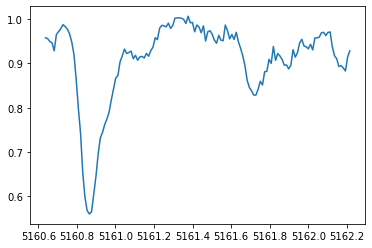

In [9]:
ncnk = 0
plt.plot(vd['wav'][ncnk],vd['sobs'][ncnk])

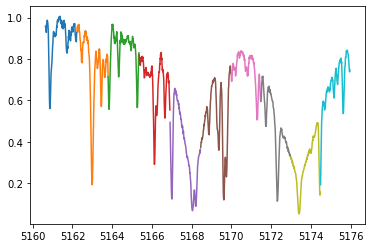

In [13]:
#Plotting 10 chunks at once 
for num in range (10):
    plt.plot(vd['wav'][num],vd['sobs'][num])
plt.show()

In [72]:
medwave= np.zeros(10)
for ichunk,num in enumerate (range(10)):
   medwave[ichunk]= np.median (vd.wav[num])
print (medwave)
#enumerate shows index of the item (numder in the array)

[5161.42790499 5163.01114376 5164.57135084 5166.13037715 5167.6774019
 5169.21249094 5170.73563102 5172.23628564 5173.73594067 5175.2239401 ]


In [21]:
len (vd['wav'])

1386

In [23]:
num_chnk=1386
medwave= np.zeros(num_chnk)
for ichunk,num in enumerate (range(num_chnk)):
   medwave[ichunk]= np.median (vd.wav[num])
print (medwave)

[5161.42790499 5163.01114376 5164.57135084 ... 7155.63094641 7157.20034028
 7158.75722612]


In [25]:
len(vd['vel'])

1386

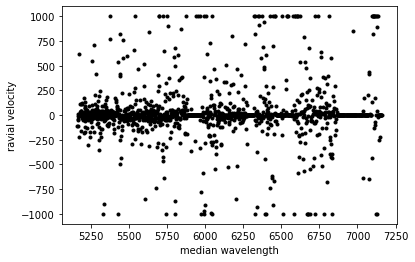

In [30]:
plt.plot (medwave,vd['vel'],'k.')#'k.'is to tell them to have the poins as black dots
plt.xlabel('median wavelength')
plt.ylabel('ravial velocity')
plt.show()

In [33]:
vd_files= glob('../Raw_Data/Spetral_Chunks/*')
len (vd_files)

172

In [34]:
for (num,fil) in enumerate( vd_files):
    print (num,fil)

0 ../Raw_Data/Spetral_Chunks/vdama_26965.201001.1131.dat
1 ../Raw_Data/Spetral_Chunks/vdama_26965.201010.1147.dat
2 ../Raw_Data/Spetral_Chunks/vdama_26965.211220.1102.dat
3 ../Raw_Data/Spetral_Chunks/vdama_26965.201103.1133.dat
4 ../Raw_Data/Spetral_Chunks/vdama_26965.220117.1098.dat
5 ../Raw_Data/Spetral_Chunks/vdama_26965.200927.1110.dat
6 ../Raw_Data/Spetral_Chunks/vdama_26965.220213.1075.dat
7 ../Raw_Data/Spetral_Chunks/vdama_26965.200926.1110.dat
8 ../Raw_Data/Spetral_Chunks/vdama_26965.211220.1100.dat
9 ../Raw_Data/Spetral_Chunks/vdama_26965.211111.1072.dat
10 ../Raw_Data/Spetral_Chunks/vdama_26965.201001.1132.dat
11 ../Raw_Data/Spetral_Chunks/vdama_26965.201001.1133.dat
12 ../Raw_Data/Spetral_Chunks/vdama_26965.211111.1073.dat
13 ../Raw_Data/Spetral_Chunks/vdama_26965.201224.1093.dat
14 ../Raw_Data/Spetral_Chunks/vdama_26965.211220.1101.dat
15 ../Raw_Data/Spetral_Chunks/vdama_26965.200205.1082.dat
16 ../Raw_Data/Spetral_Chunks/vdama_26965.200926.1111.dat
17 ../Raw_Data/Spetral_C

In [91]:
num_chnk=1386
num_fil=len (vd_files)
medwave= np.zeros(num_chnk)
for ichunk,num in enumerate (range(num_chnk)):
   medwave[ichunk]= np.median (vd.wav[num])
print (medwave)

[5161.43019277 5163.00217859 5164.57351409 ... 7155.63220196 7157.20153702
 7158.74731919]


In [92]:
#creating an array of appropriate size
medwaveall= np.zeros((num_chnk,num_fil))
for (num,fil) in enumerate(tqdm(vd_files)):
    vd = readsav(fil)['vd']
    for ichnk,numc in enumerate (range(num_chnk)):
        medwaveall[ichnk,num]=np.median (vd.wav[numc])
        

100%|█████████████████████████████████████████| 172/172 [02:15<00:00,  1.27it/s]
